In [275]:
from time import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import csv

%matplotlib inline
pd.set_option('display.max_colwidth', -1)
sns.set_theme(style="darkgrid")

DIR_DATASET = r'/Users/dev-rocks/Documents/TCC - Data Science e Big Data/Projeto/datasets/'
# DIR_DATASET = r'C:\Users\Daniel.Vale\Personal\PBDDC\TCC\Projeto_v2\datasets\\'

In [147]:
dfProposicoes = pd.read_csv(f'{DIR_DATASET}proposicoes.csv', sep=';', low_memory=False)
dfTemasProposicoes = pd.read_csv(f'{DIR_DATASET}temas.csv', sep=';', low_memory=False)
dfInteiroTeor = pd.read_csv(f'{DIR_DATASET}inteiroTeor.csv', sep=';', low_memory=False)

In [44]:
dfProposicoes.info()
qtdIdsDuplicados = dfProposicoes.duplicated(subset='id').sum()
print(f'\n[INFO  ] Quantidade de IDs duplicados: {qtdIdsDuplicados}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126398 entries, 0 to 126397
Data columns (total 31 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   id                                126398 non-null  int64  
 1   uri                               126398 non-null  object 
 2   siglaTipo                         126398 non-null  object 
 3   numero                            126398 non-null  int64  
 4   ano                               126398 non-null  int64  
 5   codTipo                           126398 non-null  int64  
 6   descricaoTipo                     126398 non-null  object 
 7   ementa                            122242 non-null  object 
 8   ementaDetalhada                   1467 non-null    object 
 9   keywords                          20047 non-null   object 
 10  dataApresentacao                  126398 non-null  object 
 11  uriOrgaoNumerador                 126398 non-null  o

[]

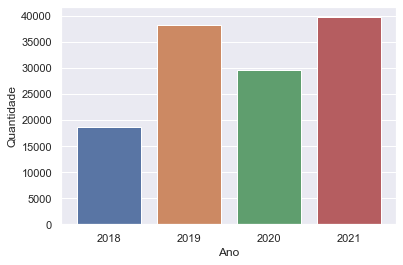

In [53]:
ax = sns.countplot(x='anoDataset',data=dfProposicoes)
ax.set_xlabel('Ano')
ax.set_ylabel('Quantidade')
ax.plot()

In [60]:
dfProposicoes.groupby(['anoDataset']).size()

anoDataset
2018    18712
2019    38246
2020    29676
2021    39764
dtype: int64

In [67]:
dfTemasProposicoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53268 entries, 0 to 53267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uriProposicao  53268 non-null  object
 1   siglaTipo      53268 non-null  object
 2   numero         53268 non-null  int64 
 3   ano            53268 non-null  int64 
 4   codTema        53268 non-null  int64 
 5   tema           53268 non-null  object
 6   relevancia     53268 non-null  int64 
 7   anoDataset     53268 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.3+ MB


In [64]:
dfTemasProposicoes.groupby(['ano', 'anoDataset']).size()

ano   anoDataset
2018  2018           5097
2019  2019          14251
2020  2020          19004
2021  2021          14916
dtype: int64

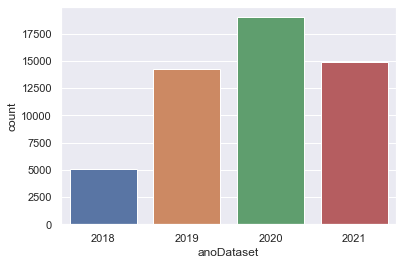

In [66]:
ax = sns.countplot(x='anoDataset',data=dfTemasProposicoes)

In [65]:
dfTemasProposicoes.groupby(['tema']).size()

tema
Administração Pública                          4957
Agricultura, Pecuária, Pesca e Extrativismo    1030
Arte, Cultura e Religião                        651
Cidades e Desenvolvimento Urbano                993
Ciência, Tecnologia e Inovação                  544
Ciências Exatas e da Terra                        3
Ciências Sociais e Humanas                        6
Comunicações                                   1979
Defesa e Segurança                             2210
Direito Civil e Processual Civil               1007
Direito Constitucional                          159
Direito Penal e Processual Penal               2033
Direito e Defesa do Consumidor                 1183
Direito e Justiça                               296
Direitos Humanos e Minorias                    5193
Economia                                       1727
Educação                                       3011
Energia, Recursos Hídricos e Minerais          1361
Esporte e Lazer                                 451
Estrutu

In [70]:
dfTemasProposicoes.groupby(['uriProposicao']).size()

uriProposicao
https://dadosabertos.camara.leg.br/api/v2/proposicoes/1299572    3
https://dadosabertos.camara.leg.br/api/v2/proposicoes/1299577    1
https://dadosabertos.camara.leg.br/api/v2/proposicoes/1555295    1
https://dadosabertos.camara.leg.br/api/v2/proposicoes/2057848    2
https://dadosabertos.camara.leg.br/api/v2/proposicoes/2057934    2
                                                                ..
https://dadosabertos.camara.leg.br/api/v2/proposicoes/593065     1
https://dadosabertos.camara.leg.br/api/v2/proposicoes/601739     2
https://dadosabertos.camara.leg.br/api/v2/proposicoes/614512     1
https://dadosabertos.camara.leg.br/api/v2/proposicoes/946475     2
https://dadosabertos.camara.leg.br/api/v2/proposicoes/946514     1
Length: 30491, dtype: int64

In [94]:
dfPreposicoesTemas = pd.merge(dfTemasProposicoes, dfProposicoes, left_on='uriProposicao', right_on='uri')
qtdProposicoesClassificadas = len(dfPreposicoesTemas.groupby(['id']).nunique())
print(f'[INFO    ] Total de proposições classificadas: {qtdProposicoesClassificadas}')

[INFO    ] Total de proposições classificadas: 30491


In [152]:
dfInteiroTeor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126398 entries, 0 to 126397
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              126398 non-null  int64 
 1   urlInteiroTeor  125762 non-null  object
 2   statusExtracao  126398 non-null  int64 
 3   tipoDocumento   126398 non-null  object
 4   tamanhoEmBytes  126398 non-null  int64 
 5   inteiroTeor     118204 non-null  object
dtypes: int64(3), object(3)
memory usage: 5.8+ MB


In [149]:
dfInteiroTeor.loc[(dfInteiroTeor['statusExtracao']==5)&(dfInteiroTeor['inteiroTeor'].isnull())][['urlInteiroTeor','statusExtracao','inteiroTeor']]

,urlInteiroTeor,statusExtracao,inteiroTeor
18,http://www.camara.gov.br/proposicoesWeb/prop_m...,5,NaN
19,http://www.camara.gov.br/proposicoesWeb/prop_m...,5,NaN
326,http://www.camara.gov.br/proposicoesWeb/prop_m...,5,NaN
2304,http://www.camara.gov.br/proposicoesWeb/prop_m...,5,NaN
2373,http://www.camara.gov.br/proposicoesWeb/prop_m...,5,NaN
...,...,...,...
126393,http://www.camara.gov.br/proposicoesWeb/prop_m...,5,NaN
126394,http://www.camara.gov.br/proposicoesWeb/prop_m...,5,NaN
126395,http://www.camara.gov.br/proposicoesWeb/prop_m...,5,NaN
126396,http://www.camara.gov.br/proposicoesWeb/prop_m...,5,NaN


In [140]:
dfInteiroTeor.loc[2373]['urlInteiroTeor']

'http://www.camara.gov.br/proposicoesWeb/prop_mostrarintegra?codteor=1715290'

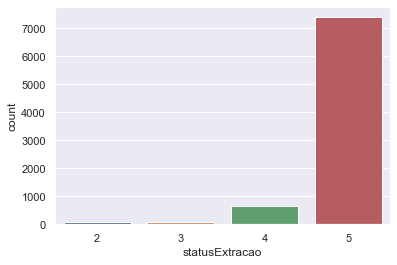

In [150]:
ax = sns.countplot(x='statusExtracao',data=dfInteiroTeor.loc[dfInteiroTeor['statusExtracao']!=1])

In [151]:
dfInteiroTeor.groupby(['statusExtracao']).count()

,id,urlInteiroTeor,tipoDocumento,tamanhoEmBytes,inteiroTeor
statusExtracao,,,,,
1,118204,118204,118204,118204,118204
2,97,97,97,97,0
3,70,70,70,70,0
4,636,0,636,636,0
5,7391,7391,7391,7391,0


In [153]:
dfInteiroTeor.groupby(['tipoDocumento']).count()

,id,urlInteiroTeor,statusExtracao,tamanhoEmBytes,inteiroTeor
tipoDocumento,,,,,
"('/Contents',)",4,4,4,4,0
"('Cannot read an empty file',)",52,52,52,52,0
"('Error -5 while decompressing data: incomplete or truncated stream',)",1,1,1,1,0
"('Multiple definitions in dictionary at byte 0x2c8 for key /PageLabels',)",1,1,1,1,0
"('Multiple definitions in dictionary at byte 0x2e8 for key /PageLabels',)",1,1,1,1,0
"(ProtocolError('Connection aborted.', OSError(50, 'Network is down')),)",1,1,1,1,0
"(ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')),)",7,7,7,7,0
"(ReadTimeoutError(""HTTPConnectionPool(host='www.camara.gov.br', port=80): Read timed out. (read timeout=None)""),)",1,1,1,1,0
"(ReadTimeoutError(""HTTPSConnectionPool(host='www.camara.leg.br', port=443): Read timed out. (read timeout=None)""),)",1,1,1,1,0


In [171]:
dfPercentualStatus = dfInteiroTeor.groupby(['statusExtracao']).count()
dfPercentualStatus['%'] = dfPercentualStatus['id']/len(dfInteiroTeor)*100
dfPercentualStatus[['id','%']]

,id,%
statusExtracao,,
1,118204,93.517302
2,97,0.076742
3,70,0.055381
4,636,0.503173
5,7391,5.847403


In [199]:
dfTamanhoConteudo = dfInteiroTeor.loc[dfInteiroTeor['statusExtracao']==1]\
.groupby(['tipoDocumento'])\
.agg({'tamanhoEmBytes': 'sum'})

tamanhoEmGigas = dfTamanhoConteudo.agg({'tamanhoEmBytes': 'sum'})/1e+9
tamanhoEmGigas = tamanhoEmGigas['tamanhoEmBytes']

print(f'[INFO    ] Tamanho dos documentos extraídos e processados: {tamanhoEmGigas:0.2f} GB')
dfTamanhoConteudo

[INFO    ] Tamanho dos documentos extraídos e processados: 108.38 GB


,tamanhoEmBytes
tipoDocumento,
application/pdf,108380121493
text/html;charset=utf-8,266750


In [384]:
def tokenizarTexto(texto: str,listaStopWords=[]):
    try:
        tamanhoTexto = len(texto.strip().split())
        
        pontuacao = ['{', '}','(', ')', ';', ':', '[', ']','#','%','*', '<','>','=','?',
                     ',', '-','_', '.', '$', '!', '?', '°', '§', '+','@',
                     'º', '/', '"', '\'','~','Ł','·','&','ˇ','ˆ','˝','˚','˛','˙','˘','˜','˝']
        texto = texto.replace('\\n', ' ')
        
        for ponto in pontuacao:
            texto = texto.replace(ponto, ' ')

        for numero in range(0, 10):
            texto = texto.replace(str(numero), '')

        tokens = texto.strip().split()
        palavrasChave = [palavra for palavra in tokens if not palavra.lower() in listaStopWords and len(palavra)>3]
        
       
        return (' '.join(palavrasChave).lower(), tamanhoTexto, len(palavrasChave))
    except Exception as e:
        print(f'[ERRO    ] Erro ao tokenizar texto: "{texto}" \n{e}')
        raise e

In [214]:
colunasProposicao=['id','uri','ementa','descricaoTipo','anoDataset']
colunasTemas=['uriProposicao','tema']
colunasInteiroTeor=['id','urlInteiroTeor','statusExtracao','tipoDocumento','tamanhoEmBytes','inteiroTeor']

dfProposicoes = pd.read_csv(f'{DIR_DATASET}proposicoes.csv', sep=';', low_memory=False, usecols=colunasProposicao)
dfTemasProposicoes = pd.read_csv(f'{DIR_DATASET}temas.csv', sep=';', low_memory=False, usecols=colunasTemas)
dfInteiroTeor = pd.read_csv(f'{DIR_DATASET}inteiroTeor.csv', sep=';', low_memory=False, usecols=colunasInteiroTeor)

dfProposicoes.info()
dfTemasProposicoes.info()
dfInteiroTeor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126398 entries, 0 to 126397
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             126398 non-null  int64 
 1   uri            126398 non-null  object
 2   descricaoTipo  126398 non-null  object
 3   ementa         122242 non-null  object
 4   anoDataset     126398 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 4.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53268 entries, 0 to 53267
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   uriProposicao  53268 non-null  object
 1   tema           53268 non-null  object
dtypes: object(2)
memory usage: 832.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126398 entries, 0 to 126397
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id   

In [215]:
dfAuxiliar = pd.merge(dfProposicoes,dfInteiroTeor,left_on='id',right_on='id')
dfAuxiliar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126398 entries, 0 to 126397
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              126398 non-null  int64 
 1   uri             126398 non-null  object
 2   descricaoTipo   126398 non-null  object
 3   ementa          122242 non-null  object
 4   anoDataset      126398 non-null  int64 
 5   urlInteiroTeor  125762 non-null  object
 6   statusExtracao  126398 non-null  int64 
 7   tipoDocumento   126398 non-null  object
 8   tamanhoEmBytes  126398 non-null  int64 
 9   inteiroTeor     118204 non-null  object
dtypes: int64(4), object(6)
memory usage: 10.6+ MB


In [424]:
dfUnificado = pd.merge(dfAuxiliar,dfTemasProposicoes,left_on='uri',right_on='uriProposicao',how='left')
dfUnificado['tokens'] = np.NaN
dfUnificado['qtdTokens'] = 0
dfUnificado['semConteudo'] = pd.isna(dfUnificado['ementa']) & pd.isna(dfUnificado['inteiroTeor'])
dfUnificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149175 entries, 0 to 149174
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              149175 non-null  int64  
 1   uri             149175 non-null  object 
 2   descricaoTipo   149175 non-null  object 
 3   ementa          145019 non-null  object 
 4   anoDataset      149175 non-null  int64  
 5   urlInteiroTeor  148537 non-null  object 
 6   statusExtracao  149175 non-null  int64  
 7   tipoDocumento   149175 non-null  object 
 8   tamanhoEmBytes  149175 non-null  int64  
 9   inteiroTeor     140584 non-null  object 
 10  uriProposicao   53268 non-null   object 
 11  tema            53268 non-null   object 
 12  tokens          0 non-null       float64
 13  semConteudo     149175 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(8)
memory usage: 16.1+ MB


In [426]:
dfUnificado.groupby(['semConteudo']).size().sort_values(ascending=False).head(50)

semConteudo
False    148186
True     989   
dtype: int64

In [465]:
def tokenizarDataset(df,qtdLimite=0):
    try:
        dfStopWords = pd.read_csv(f'{DIR_DATASET}stop_words.csv', usecols=['stop_words']) \
                .replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["", ""])

        listaStopWords = dfStopWords['stop_words'].values.tolist()
        print(f'[INFO    ] Quantidade de stop words: {len(listaStopWords)}')
        
        dfParaExtracao = df.loc[df['tokens'].isnull()]
        print(f'[INFO    ] Proposicoes para tokenização: {len(dfParaExtracao)}')

        contador = 0
        contadorNulos = 0
        t0 = time()
        for index,linha in dfParaExtracao.iterrows():
            if  not linha['semConteudo']:
                ementa = '' if pd.isna(linha['ementa']) else linha['ementa']
                inteiroTeor = '' if pd.isna(linha['inteiroTeor']) else linha['inteiroTeor']
                idProposicao = linha['id']

                tokens, tamanhoInicial, tamanhoFinal = tokenizarTexto(f'{ementa} {inteiroTeor}',listaStopWords)

                df.loc[df['id']==idProposicao,['ementa',
                                               'inteiroTeor',
                                               'tokens',
                                              'qtdTokens']] = [ementa.strip(),inteiroTeor.strip(),tokens,len(tokens.split())]


                if contador%1000==0:
                    zeros = (6-len(str(contador)))*'0'
                    print(f'[INFO    ] [{zeros}{contador}][{idProposicao}]Palavras: {tamanhoInicial} \
                    | Tokens: {tamanhoFinal} \
                    | Redução: {(tamanhoInicial-tamanhoFinal)/tamanhoInicial*100:.0f}%')
                    
                if contador%10000==0:
                    df.to_csv(f'{DIR_DATASET}/proposicoesUnificado_v2.csv',
                              index=False,sep=';',quoting=csv.QUOTE_ALL,  escapechar="\\")
                    print('.' * 80 )
                    
                if qtdLimite>0 and contador ==qtdLimite:
                    break

                contador+=1
            else:
                contadorNulos+=1
                
        duracao = time()-t0
        print(f'[INFO    ] Tokenizado {contador} proposicoes em {duracao:.0f} segundos. Media={(contador/duracao):.2f} prop/seg' )
        print(f'[INFO    ] Proposições sem ementa e sem inteiro teor: {contadorNulos}' )
        
        
    except Exception as e:
        print(f'[ERRO    ] Erro ao tokenizar dataset: {e.args}')
        print(f'[ERRO    ] Ementa: {ementa} \n Teor: {inteiroTeor}')
        raise e
    finally:
        df.to_csv(f'{DIR_DATASET}/proposicoesUnificado_v2.csv',index=False,sep=';',quoting=csv.QUOTE_ALL,  escapechar="\\")

In [445]:
tokenizarDataset(dfUnificado)

[INFO    ] Quantidade de stop words: 596
[INFO    ] Proposicoes para tokenização: 129168
[INFO    ] [000000][2211661]Palavras: 252                     | Tokens: 124                     | Redução: 51%
................................................................................
[INFO    ] [001000][2212825]Palavras: 8                     | Tokens: 1                     | Redução: 88%
[INFO    ] [002000][2214015]Palavras: 542                     | Tokens: 227                     | Redução: 58%
[INFO    ] [003000][2215028]Palavras: 720                     | Tokens: 278                     | Redução: 61%
[INFO    ] [004000][2216065]Palavras: 1385                     | Tokens: 567                     | Redução: 59%
[INFO    ] [005000][2217390]Palavras: 571                     | Tokens: 274                     | Redução: 52%
[INFO    ] [006000][2218457]Palavras: 429                     | Tokens: 177                     | Redução: 59%
[INFO    ] [007000][2219564]Palavras: 165               

[INFO    ] [069000][2258131]Palavras: 157                     | Tokens: 7                     | Redução: 96%
[INFO    ] [070000][2258899]Palavras: 25                     | Tokens: 3                     | Redução: 88%
................................................................................
[INFO    ] [071000][2259695]Palavras: 155                     | Tokens: 16                     | Redução: 90%
[INFO    ] [072000][2260503]Palavras: 226                     | Tokens: 21                     | Redução: 91%
[INFO    ] [073000][2261199]Palavras: 368                     | Tokens: 53                     | Redução: 86%
[INFO    ] [074000][2262102]Palavras: 75                     | Tokens: 17                     | Redução: 77%
[INFO    ] [075000][2262896]Palavras: 24                     | Tokens: 3                     | Redução: 88%
[INFO    ] [076000][2263611]Palavras: 929                     | Tokens: 362                     | Redução: 61%
[INFO    ] [077000][2264373]Palavras: 730   

In [467]:
dfUnificado.loc[dfUnificado['id']==2211661][['id','tokens','descricaoTipo','tema','inteiroTeor']]
dfUnificado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149175 entries, 0 to 149174
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id              149175 non-null  int64 
 1   uri             149175 non-null  object
 2   descricaoTipo   149175 non-null  object
 3   ementa          148186 non-null  object
 4   anoDataset      149175 non-null  int64 
 5   urlInteiroTeor  148537 non-null  object
 6   statusExtracao  149175 non-null  int64 
 7   tipoDocumento   149175 non-null  object
 8   tamanhoEmBytes  149175 non-null  int64 
 9   inteiroTeor     148186 non-null  object
 10  uriProposicao   53268 non-null   object
 11  tema            53268 non-null   object
 12  tokens          148186 non-null  object
 13  semConteudo     149175 non-null  bool  
dtypes: bool(1), int64(4), object(9)
memory usage: 16.1+ MB


In [463]:
dfStopWords = pd.read_csv(f'{DIR_DATASET}stop_words.csv', usecols=['stop_words']) \
                .replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["", ""])

dfStopWords.describe()

,stop_words
count,596
unique,592
top,o
freq,2


In [469]:
dfUnificado['qtdTokens'] = dfUnificado.apply(lambda linha: 0 if pd.isna(linha['tokens']) else len(linha['tokens'].split()),axis=1)
dfUnificado.to_csv(f'{DIR_DATASET}/proposicoesUnificado.csv',index=False,sep=';',quoting=csv.QUOTE_ALL,  escapechar="\\")